In [1]:
# Import the required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten

Using TensorFlow backend.


In [2]:
# Load the Neural Network
model = Sequential()
model.add(Conv2D(24, kernel_size = 3, activation = 'relu', input_shape = (28, 28, 1)))
model.add(Conv2D(24, kernel_size = 3, activation = 'relu'))
model.add(Flatten())
model.add(Dense(47, activation = 'softmax'))
model.load_weights('weights.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
# A function to perform predictions using the loaded network
mapping = "0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghnqrt"
def predict(image):
    image = cv2.copyMakeBorder(image, 15, 15, 15, 15, cv2.BORDER_CONSTANT) # Padding added
    image = cv2.resize(image, (28,28)).reshape(1, 28, 28, 1)/255 # Resized, reshaped and normalised
    return mapping[np.argmax(model.predict(image))]

In [ ]:
# Either capture an image from Web Cam...
cam = cv2.VideoCapture(0)
while True:
    _, frame = cam.read()
    cv2.imshow("Camera", frame)
    if cv2.waitKey(1)%256 == 32:    # if Space pressed
        image = frame
        break
cam.release()
cv2.destroyAllWindows()

In [4]:
# ... or read an existing one from disc
image = cv2.imread('3.jpg')

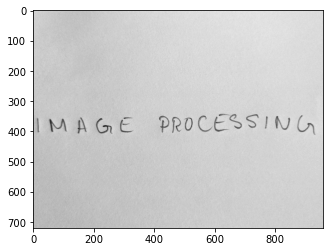

In [5]:
# Downscale the image to 720p and convert to grayscale
if image.shape[0] > 720:
    scale = 720 / image.shape[0]
    width = int(image.shape[1] * scale)
    height = int(image.shape[0] * scale)
    image = cv2.resize(image, (width, height))
    
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(gray, cmap = "gray")
plt.show()

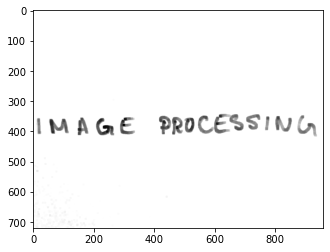

In [10]:
# Thicken the handwriting if necessary 
kernel = np.ones((2,2), np.uint8) 
gray = cv2.erode(gray, kernel, iterations = 3) # more iterations = more thick
plt.imshow(gray, cmap = "gray")
plt.show()

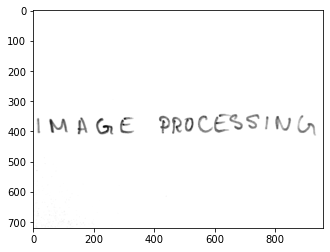

In [7]:
# Increase the contrast if necessary
gray = cv2.convertScaleAbs(gray, alpha = 1.5, beta = 0) # more alpha = more contrast
plt.imshow(gray, cmap = "gray")
plt.show()

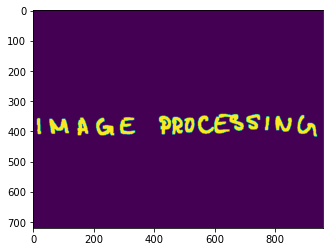

In [11]:
# Convert image from gray to binary using a suitable threshold
thresh = cv2.threshold(gray,230, 255, cv2.THRESH_BINARY_INV)[1] # second value is the threshold
plt.imshow(thresh)
plt.show()

In [13]:
output_image = image.copy()
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    if w+h > 40:
        cv2.rectangle(output_image, (x-3, y-20), (x+w+3, y+h+3), (0,255,0), 2)
        char = predict(thresh[y:y+h, x:x+w])
        output_image = cv2.putText(output_image, char, (x-3,y-3), cv2.FONT_HERSHEY_SIMPLEX , 0.7, (255,0,0), 1, cv2.LINE_AA)
cv2.imshow('Outpt', output_image)
_ = cv2.waitKey()